In [2]:
import pandas as pd
import warnings
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns



pd.options.display.max_columns = None
warnings.filterwarnings('ignore')





Accedo a la primera tabla: Hechos

In [3]:
df = pd.read_excel('Tablas/homicidios_mod.xlsx')
# Algunas estadísticas básicas
df.describe()



,N_VICTIMAS,FECHA,AAAA,MM,DD,Altura,COMUNA
count,696.000000,696,696.000000,696.000000,696.000000,129.000000,696.000000
mean,1.030172,2018-09-14 05:12:24.827586048,2018.188218,6.692529,15.936782,3336.635659,7.425287
min,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,30.000000,0.000000
25%,1.000000,2017-04-02 12:00:00,2017.000000,4.000000,9.000000,1359.000000,4.000000
50%,1.000000,2018-07-12 12:00:00,2018.000000,7.000000,16.000000,2551.000000,8.000000
75%,1.000000,2020-01-04 06:00:00,2020.000000,10.000000,23.000000,4500.000000,11.000000
max,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,16080.000000,15.000000
std,0.179393,NaN,1.683754,3.571309,8.639646,3060.641793,4.387050


In [4]:
# Tipos de datos
df.dtypes

ID                               object
N_VICTIMAS                        int64
FECHA                    datetime64[ns]
AAAA                              int64
MM                                int64
DD                                int64
HORA                             object
HH                               object
LUGAR_DEL_HECHO                  object
TIPO_DE_CALLE                    object
Calle                            object
Altura                          float64
Cruce                            object
Dirección Normalizada            object
COMUNA                            int64
XY (CABA)                        object
pos x                            object
pos y                            object
PARTICIPANTES                    object
VICTIMA                          object
ACUSADO                          object
dtype: object

Busco nulos y duplicados.

In [5]:
df.drop_duplicates(inplace=True)
df.dropna(axis=1)
df

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0092,1,2021-12-12,2021,12,12,06:20:00,6,AV. RIVADAVIA Y AV. PUEYRREDON,AVENIDA,RIVADAVIA AV.,NaN,PUEYRREDON AV.,RIVADAVIA AV. y PUEYRREDON AV.,3,Point (105258.35368554 102122.93231400),-58.40596860,-34.61011987,PEATON-AUTO,PEATON,AUTO
692,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,RIESTRA AV.,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
693,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,"PERON, EVA AV.",4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS
694,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.",NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO


Ahora analizo datos faltantes y outliers

In [6]:
# El id 2018-0084 contiene un valor anómalo en pos x (longitud). Lo reemplazo por el correcto, utilizando información disponible en https://mapa.buenosaires.gob.ar/informacion/?lat=-34.622596&lng=-58.365276&zl=15&modo=transporte&dir=Cochabamba+y+Moreau+De+Justo%2C+Alicia+Av.&ilat=-34.622599&ilng=-58.365237

# El id 2020-0039 no tiene información de lat. y long. La obtengo de https://mapa.buenosaires.gob.ar/informacion/?lat=-34.663515&lng=-58.493105&zl=15&modo=transporte&dir=Murguiondo+2700&ilat=-34.663417&ilng=-58.493244

# Para el resto de los datos faltantes en pos x y pos y no se pudieron encontrar valores.

In [7]:
# Limpio y luego cambio algunos tipos de datos
df['pos x'] = df['pos x'].replace('.', 0)
df['pos y'] = df['pos x'].replace('.', 0)

df['pos x'] = df['pos x'].astype(float)
df['pos y'] = df['pos y'].astype(float)

Leo la siguiente tabla: Víctimas

In [8]:
dfv = pd.read_excel('Tablas/homicidios.xlsx', sheet_name="VICTIMAS")
dfv.dtypes



ID_hecho                       object
FECHA                  datetime64[ns]
AAAA                            int64
MM                              int64
DD                              int64
ROL                            object
VICTIMA                        object
SEXO                           object
EDAD                           object
FECHA_FALLECIMIENTO            object
dtype: object

In [9]:
dfv.describe()

,FECHA,AAAA,MM,DD
count,717,717.000000,717.000000,717.000000
mean,2018-09-09 01:36:24.100418304,2018.174338,6.688982,15.960948
min,2016-01-01 00:00:00,2016.000000,1.000000,1.000000
25%,2017-04-01 00:00:00,2017.000000,4.000000,9.000000
50%,2018-07-07 00:00:00,2018.000000,7.000000,16.000000
75%,2019-12-18 00:00:00,2019.000000,10.000000,23.000000
max,2021-12-30 00:00:00,2021.000000,12.000000,31.000000
std,NaN,1.672655,3.575140,8.683358


Elimino duplicados y vacíos.

In [10]:
dfv.drop_duplicates(subset='ID_hecho', keep='first', inplace=True)
dfv.dropna(axis=1)
dfv

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


Analizaremos ahora las franjas horarias de ocurrencia de siniestros fatales.


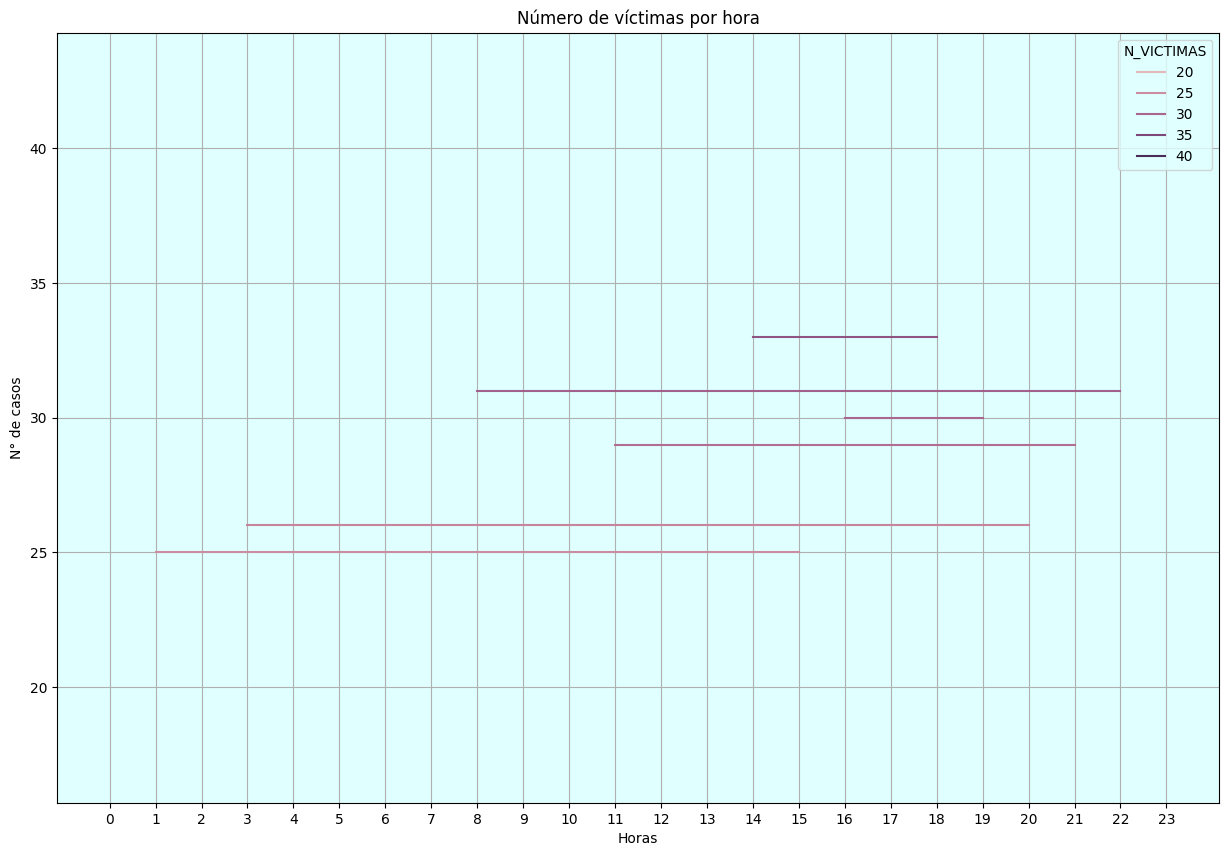

In [11]:
# Establezco el color de fondo de los gráficos
plt.rcParams['axes.facecolor'] = '#E0FFFF'
# Estableco el color de la línea que muestra la media
l_color = '#98FB98'
# Elimino filas con 'SD' en columna 'HH'
indexNames = df[df['HH'] == 'SD'].index
df.drop(indexNames, inplace=True)
plt.figure(figsize=(15, 10))


# Agrupo el dataframe por 'HORA' y cuento la cantidad de eventos por hora
df_agrupado = df.groupby('HH')['N_VICTIMAS'].sum().reset_index()

# Gráfico
ax = sns.lineplot(x='HH', y='N_VICTIMAS', hue='N_VICTIMAS', data=df_agrupado)
plt.xticks(df_agrupado['HH'].unique())  

ax.set(xlabel='Horas', ylabel='N° de casos')
ax.set_title('Número de víctimas por hora')
plt.grid(True)
plt.show()

En el gráfico precedente podemos observar que el rango horario con mayor cantidad de casos se produce aproximadamente en la franja de horas hábiles (9 a 21 hs.), con un pico entre las 14 y las 18 hs. 


A continuación analizaremos la cantidad de casos según las comunas.


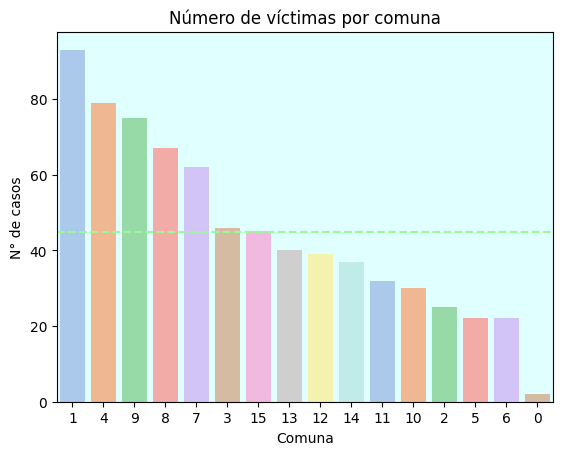

In [12]:
# Cuento la cantidad de casos por comuna
df_agrupado = df.groupby('COMUNA')['N_VICTIMAS'].sum().reset_index()
# Ordeno en forma descendente, para luego graficar en ése orden
df_agrupado = df_agrupado.sort_values('N_VICTIMAS', ascending=False)
orden_comunas = df_agrupado['COMUNA'].values
# Calculo la media
media = df_agrupado['N_VICTIMAS'].mean()
# Crear el gráfico de barras
# Usamos una paleta de colores en tonos pastel
a = sns.color_palette("pastel")
ax = sns.barplot(x='COMUNA', y='N_VICTIMAS', data=df_agrupado, order=orden_comunas, palette=a)
# Agrega una línea horizontal en la posición de la media
ax.axhline(media, color=l_color, linestyle='--')
# Rotulo ejes
ax.set(xlabel='Comuna', ylabel='N° de casos')
# Defino el título
ax.set_title('Número de víctimas por comuna')
# Muestro el gráfico
plt.show()



Como podemos observar existen 5 comunas donde el número de casos es sensiblemente superior a la media, que aparece como una línea verde horizontal en el gráfico.

Analizaremos ahora el tipo de arterias donde ocurren los accidentes.

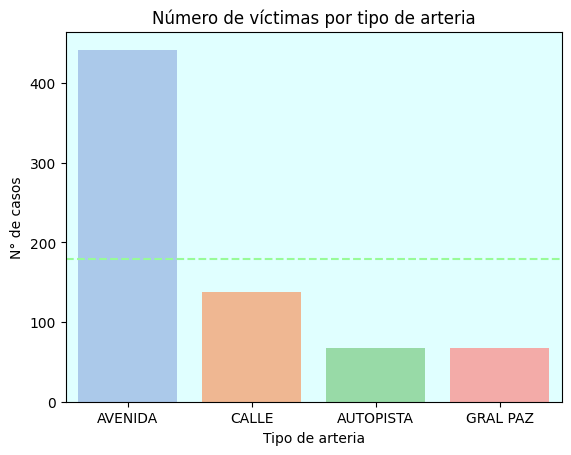

In [13]:
# Cuento la cantidad de casos por tipo de arteria
df_agrupado = df.groupby('TIPO_DE_CALLE')['N_VICTIMAS'].sum().reset_index()
# Ordeno en forma descendente, para luego graficar en ése orden
df_agrupado = df_agrupado.sort_values('N_VICTIMAS', ascending=False)
orden_comunas = df_agrupado['TIPO_DE_CALLE'].values
# Calculo la media
media = df_agrupado['N_VICTIMAS'].mean()
# Crear el gráfico de barras
ax = sns.barplot(x='TIPO_DE_CALLE', y='N_VICTIMAS', data=df_agrupado, order=orden_comunas, palette=a)
# Agrega una línea horizontal en la posición de la media
ax.axhline(media, color=l_color, linestyle='--')
# Rotulo ejes
ax.set(xlabel='Tipo de arteria', ylabel='N° de casos')
# Defino el título
ax.set_title('Número de víctimas por tipo de arteria')
# Muestro el gráfico
plt.show()

Previsiblemente las avenidas aventajan, por mucho, a las calles y autopistas (La avenida Gral. Paz puede considerarse autopista) en cuanto a número de casos.

Ahora analizaremos el sexo más afectado en las víctimas.

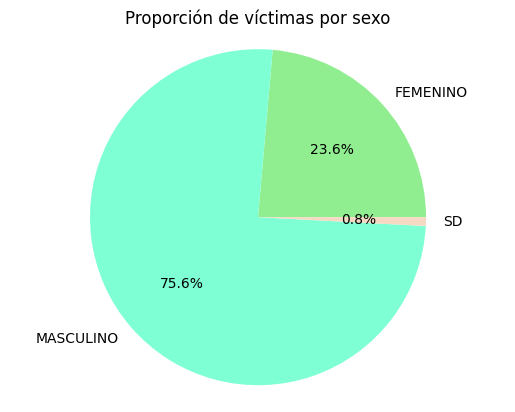

In [24]:
# Para analizar todos los casos necesito unir la tabla VICTIMAS con la tabla HECHOS
# Unifico el nombre de la columna ID
dfv.rename(columns={'ID_hecho': 'ID'}, inplace=True)
# Utilizo la opción 'outer' para agregar las filas extras de dfv
df_nuevo = df.merge(dfv, on='ID', how='inner')
# Elimino columnas que no me servirán
df_nuevo = df_nuevo.drop(["FECHA_y", "AAAA_y", "MM_y", "DD_y", "VICTIMA_y"], axis=1)
# Guardo el dataframe para luego utilizarlo en Power Bi
df_nuevo.to_excel('Tablas/df_nuevo.xlsx')


# Grafico en forma de torta. Asigno datos y colores
df_agrupado = df_nuevo.groupby('SEXO')['N_VICTIMAS'].sum().reset_index()
sizes = df_agrupado['N_VICTIMAS']
labels = df_agrupado['SEXO']
colors = ['#90EE90', '#7FFFD4', '#F5D9C3']

# Creo el gráfico de torta
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors = colors)

# Me aseguro que el gráfico sea un círculo
plt.axis('equal')

# Lo muestro
plt.title('Proporción de víctimas por sexo')
plt.show()


Analizamos ahora el rol de víctima más frecuente.

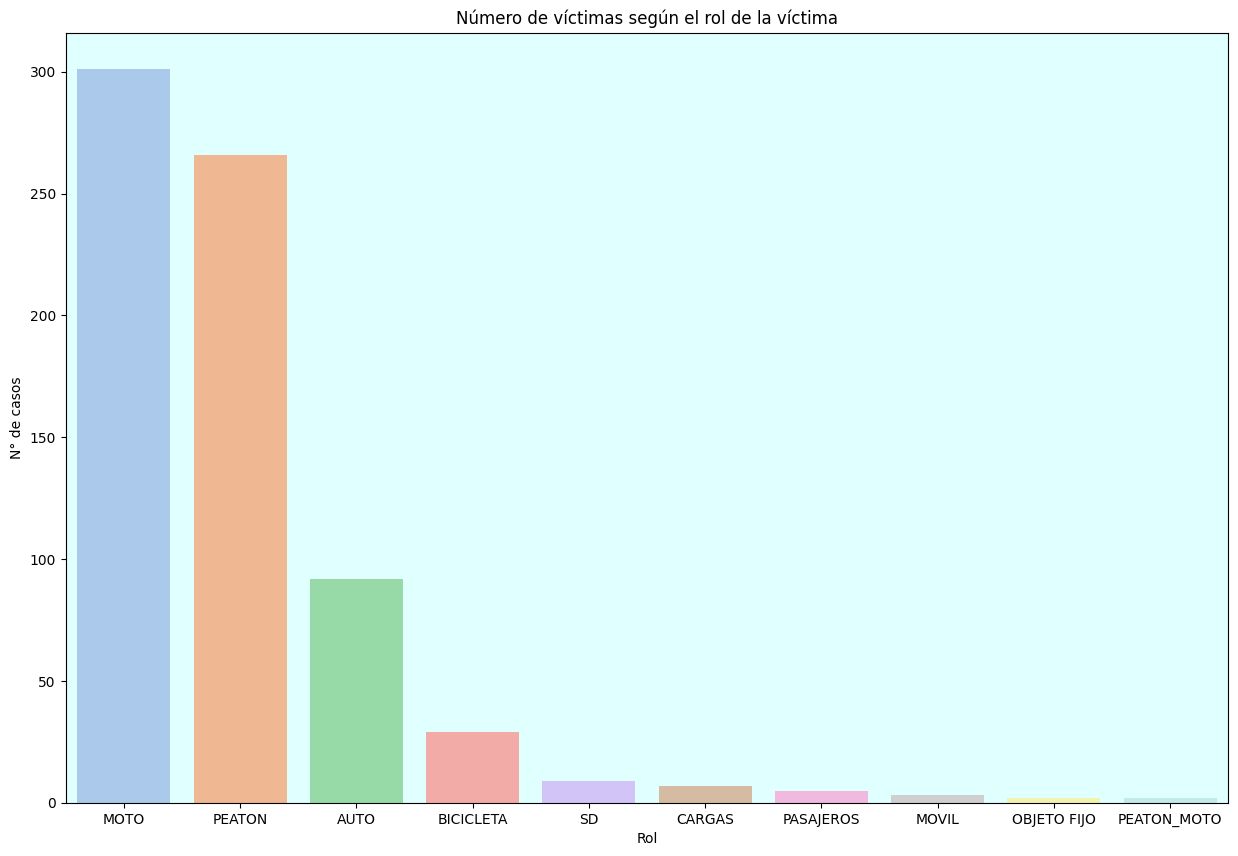

In [31]:
# Cuento la cantidad de casos según el rol de la víctima
df_agrupado = df.groupby('VICTIMA')['N_VICTIMAS'].sum().reset_index()
# Ordeno en forma descendente, para luego graficar en ése orden
df_agrupado = df_agrupado.sort_values('N_VICTIMAS', ascending=False)
orden_comunas = df_agrupado['VICTIMA'].values

# Crear el gráfico de barras
plt.figure(figsize=(15, 10))
ax = sns.barplot(y='N_VICTIMAS', x='VICTIMA', data=df_agrupado, order=orden_comunas, palette=a)

# Rotulo ejes
ax.set(xlabel='Rol', ylabel='N° de casos')
# Defino el título
ax.set_title('Número de víctimas según el rol de la víctima')
# Muestro el gráfico

plt.show()

Dado que en Argentina no se respeta en general la prioridad del peatón, era esperable un alto número de casos con peatones involucrados. Las motos son muy numerosas y brindan poca protección a sus ocupantes, con lo cual entiendo se explica el primer lugar.

Ahora muestro la cantidad de víctimas por año

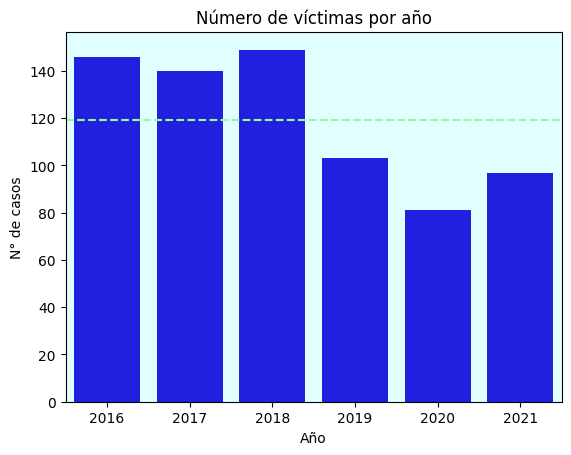

In [33]:
# Cuento la cantidad de víctimas por año
df_agrupado = df.groupby('AAAA')['N_VICTIMAS'].sum().reset_index()

# Calculo la media
media = df_agrupado['N_VICTIMAS'].mean()
# Crear el gráfico de barras

ax = sns.barplot(y='N_VICTIMAS', x='AAAA', data=df_agrupado, palette= ["blue"])
# Agrega una línea horizontal en la posición de la media
ax.axhline(media, color=l_color, linestyle='--')
# Rotulo ejes
ax.set(xlabel='Año', ylabel='N° de casos')
# Defino el título
ax.set_title('Número de víctimas por año')
# Muestro el gráfico
plt.show()


Observamos una disminución en 2020 y 2021, coincidentemente con la menor circulación debido a la pandemia.

Analizaremos ahora el rol de los acusados respecto a la cantidad de víctimas.

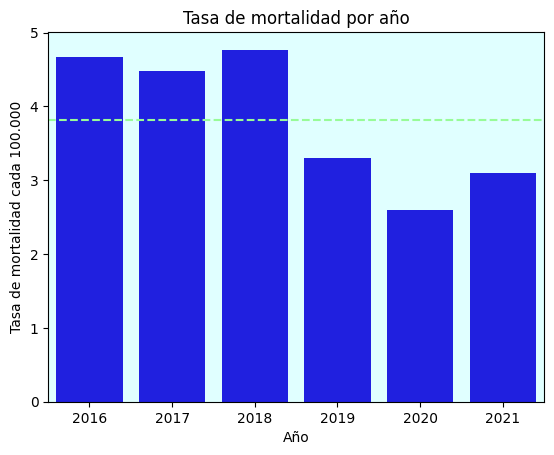

In [34]:
# Calculamos ahora la tasa cada 100.000 habitantes

df = df.assign(TASA = lambda x: 0.032 * x["N_VICTIMAS"])
df_agrupado = df.groupby('AAAA')['TASA'].sum().reset_index()

# Calculo la media
media = df_agrupado['TASA'].mean()
# Crear el gráfico de barras

ax = sns.barplot(y='TASA', x='AAAA', data=df_agrupado, palette= ["blue"] )
# Agrega una línea horizontal en la posición de la media
ax.axhline(media, color=l_color, linestyle='--')
# Rotulo ejes
ax.set(xlabel='Año', ylabel='Tasa de mortalidad cada 100.000')
# Defino el título
ax.set_title('Tasa de mortalidad por año')
# Muestro el gráfico
plt.show()


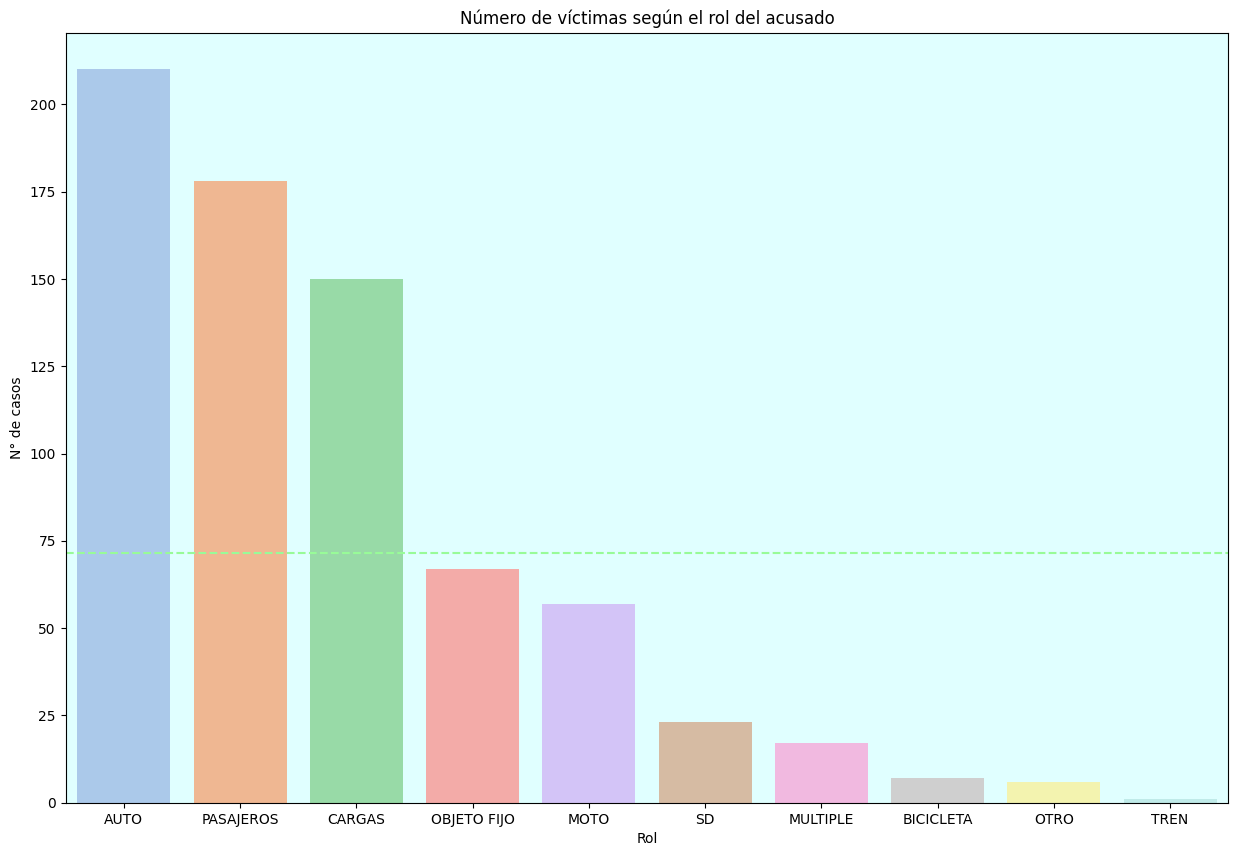

In [17]:
# Cuento la cantidad de víctimas según el rol de la víctima
df_agrupado = df.groupby('ACUSADO')['N_VICTIMAS'].sum().reset_index()
# Ordeno en forma descendente, para luego graficar en ése orden
df_agrupado = df_agrupado.sort_values('N_VICTIMAS', ascending=False)
orden_comunas = df_agrupado['ACUSADO'].values
# Calculo la media
media = df_agrupado['N_VICTIMAS'].mean()
# Crear el gráfico de barras
plt.figure(figsize=(15, 10))
ax = sns.barplot(y='N_VICTIMAS', x='ACUSADO', data=df_agrupado, order=orden_comunas, palette=a)
# Agrega una línea horizontal en la posición de la media
ax.axhline(media, color=l_color, linestyle='--')
# Rotulo ejes
ax.set(xlabel='Rol', ylabel='N° de casos')
# Defino el título
ax.set_title('Número de víctimas según el rol del acusado')
# Muestro el gráfico
plt.show()

Aquí se oserva una preponderancia de los vehículos de mayor porte (respecto a motos y bicicletas) que probablemente sean, además, los más numerosos. Me llama la atención el relativamente elevado número de víctimas de choques contra elementos fijos. Supongo que en general se trata de la  pérdida de control por exceso de velocidad ó consumo excesivo de alcohol.

Ahora voy a analizar los rangos etarios y la cantidad de casos.

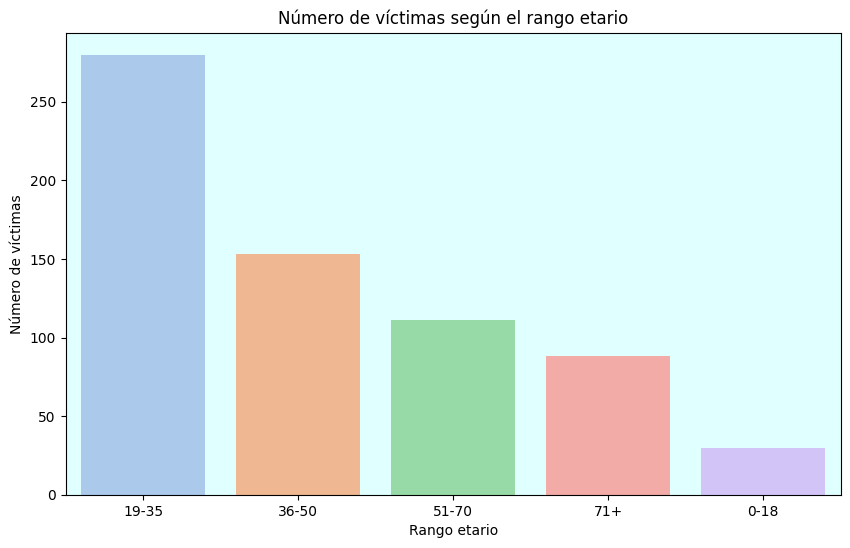

In [18]:
# Me quedo únicamente con las columnas que necesito
df_s = df_nuevo[['N_VICTIMAS', 'EDAD']]
df_s.dropna(inplace=True)
indexNames = df_s[df_s['EDAD'] == 'SD'].index
df_s.drop(indexNames, inplace=True)
# Defino los rangos etarios
bins = [0, 18, 35, 50, 70, 100]
# Defino las etiquetas para los rangos
labels = ['0-18', '19-35', '36-50', '51-70', '71+']
# Creo una nueva columna con los rangos etarios
df_s['rango_etario'] = pd.cut(df_s['EDAD'], bins=bins, labels=labels)
# Elimino la columna 'EDAD'
df_s = df_s.drop('EDAD', axis=1)
# Agrupo por rango etario
df_agrupado = df_s.groupby('rango_etario')['N_VICTIMAS'].sum().reset_index()
df_ordenado = df_agrupado.sort_values('N_VICTIMAS', ascending=False)
orden = df_ordenado['rango_etario'].values
# Creo el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(y='N_VICTIMAS', x='rango_etario', data=df_ordenado, palette=a, order = orden)
# Rotulo ejes
ax.set(xlabel='Rango etario', ylabel='Número de víctimas')
# Defino el título
ax.set_title('Número de víctimas según el rango etario')
# Muestro el gráfico
plt.show()





In [19]:
df_ordenado

,rango_etario,N_VICTIMAS
1,19-35,280
2,36-50,153
3,51-70,111
4,71+,88
0,0-18,30


Ahora analizaremos la cantidad de casos según participantes

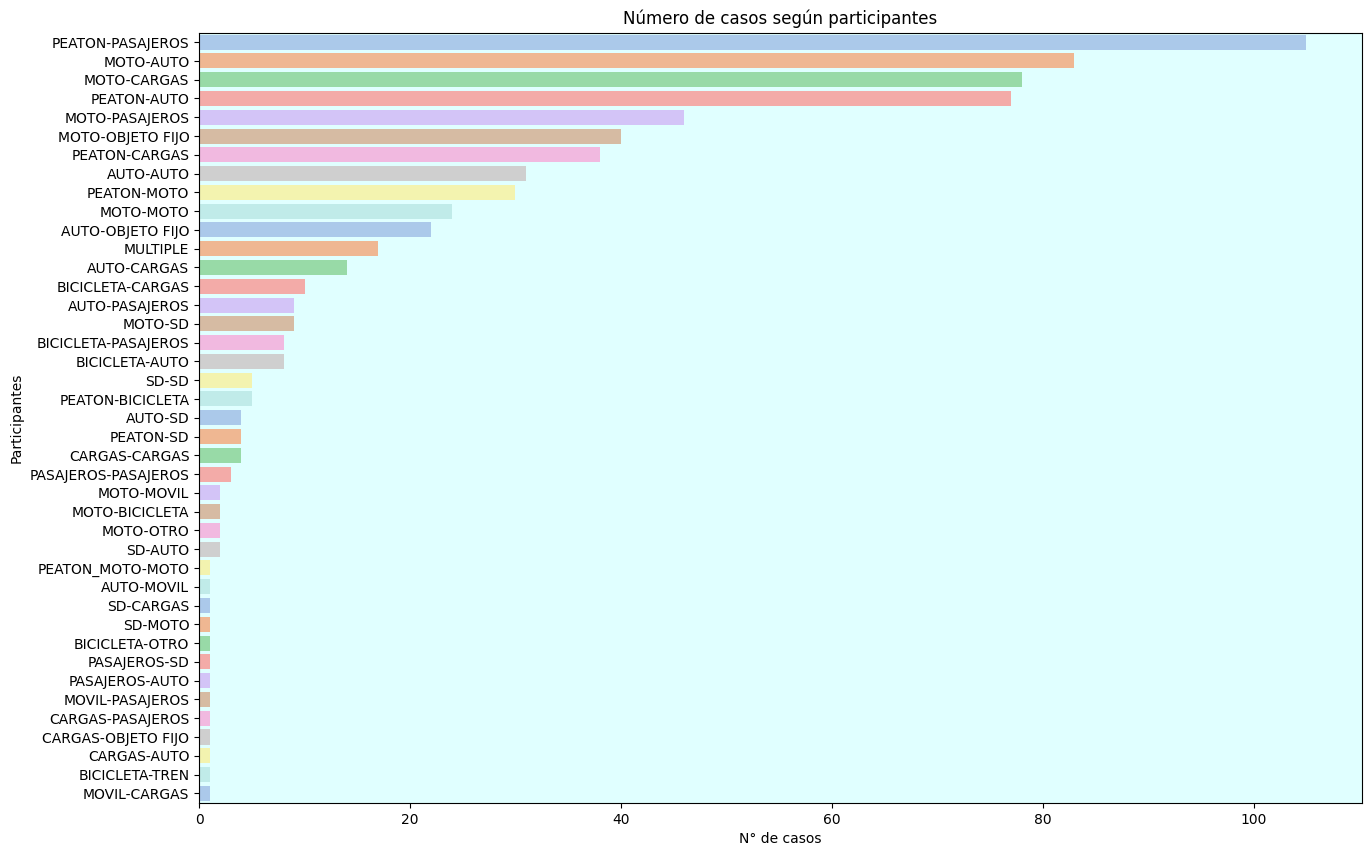

In [32]:
# Cuento la cantidad de casos según el rol de la víctima
df_agrupado = df.groupby('PARTICIPANTES')['N_VICTIMAS'].count().reset_index()
# Ordeno en forma descendente, para luego graficar en ése orden
df_agrupado = df_agrupado.sort_values('N_VICTIMAS', ascending=False)
orden_comunas = df_agrupado['PARTICIPANTES'].values

# Crear el gráfico de barras
plt.figure(figsize=(15, 10))
ax = sns.barplot(x='N_VICTIMAS', y='PARTICIPANTES', data=df_agrupado, order=orden_comunas, palette=a)

# Rotulo ejes
ax.set(ylabel='Participantes', xlabel='N° de casos')
# Defino el título
ax.set_title('Número de casos según participantes')
# Muestro el gráfico

plt.show()

Aquí observamos una clara preponderancia de los transportes públicos de pasajeros en los accidentes con peatones involucrados. Habitualmente los conductores de estos vehículos están sometidos, además del estrés generado por el caótico y abundante tránsito en CABA, a una presión constante para cumplir con su recorrido en un determinado lapso de tiempo, no siempre lo suficientemente realista.